# Análisis Exploratorio de Datos

Este notebook realiza el análisis exploratorio del dataset de operaciones de compra-venta de ganado vacuno con destino a faena.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


In [28]:
def cargarDataset(ruta_archivo: str) -> pd.DataFrame:
    """
    Carga el dataset desde el archivo CSV de manera eficiente para datasets grandes
    """
    try:
        print(f"Cargando dataset desde: {ruta_archivo}")
        df = pd.read_csv(ruta_archivo, low_memory=False)
        print(f"Dataset cargado exitosamente. Forma: {df.shape}")
        return df
    except Exception as e:
        print(f"Error al cargar el dataset: {e}")
        return None

# Cargar el dataset
df = cargarDataset('../data/completo-ago20-ago21.csv')


Cargando dataset desde: ../data/completo-ago20-ago21.csv
Dataset cargado exitosamente. Forma: (1721218, 11)


In [34]:
print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print("\n=== PRIMERAS 5 FILAS ===")
display(df.head())
print(df.info())
print("\n=== NOMBRES DE COLUMNAS ===")
for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")

Dimensiones: 1,721,218 filas x 11 columnas

=== PRIMERAS 5 FILAS ===


,Fecha Comprobante,Provincia Origen,Partido Origen,Zona Destino,Raza,Categoria,Cabezas Comercializadas,Unidad de Medida,Precio cabeza,Precio Kg,Cantidad de Kg
0,23/08/2021,BUENOS AIRES,NUEVE DE JULIO,ZONA 3 B,Aberdeen Angus,Bovino Vaquillona Especial Liviana hasta 390 k...,7.0,Kg. Vivo,NaN,169,1970.0
1,23/08/2021,BUENOS AIRES,NUEVE DE JULIO,ZONA 3 B,Aberdeen Angus,Bovino Novillito Especial Liviano hasta 390 ki...,3.0,Kg. Vivo,NaN,169,910.0
2,23/08/2021,BUENOS AIRES,NUEVE DE JULIO,ZONA 3 B,Aberdeen Angus,Bovino Novillito Especial Pesado más de 390 ki...,1.0,Kg. Vivo,NaN,158,395.0
3,22/08/2021,CORDOBA,JUAREZ CELMAN,ZONA 5 B,Aberdeen Angus,Bovino Vaquillona Regular (4 dientes),14.0,Kg. Vivo,NaN,154,4242.0
4,22/08/2021,CORDOBA,JUAREZ CELMAN,ZONA 5 B,Aberdeen Angus,Bovino Novillito Regular (4 dientes),53.0,Kg. Vivo,NaN,154,16059.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721218 entries, 0 to 1721217
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Fecha Comprobante        object 
 1   Provincia Origen         object 
 2   Partido Origen           object 
 3   Zona Destino             object 
 4   Raza                     object 
 5   Categoria                object 
 6   Cabezas Comercializadas  float64
 7   Unidad de Medida         object 
 8   Precio cabeza            object 
 9   Precio Kg                object 
 10  Cantidad de Kg           float64
dtypes: float64(2), object(9)
memory usage: 144.5+ MB
None

=== NOMBRES DE COLUMNAS ===
 1. Fecha Comprobante
 2. Provincia Origen
 3. Partido Origen
 4. Zona Destino
 5. Raza
 6. Categoria
 7. Cabezas Comercializadas
 8. Unidad de Medida
 9. Precio cabeza
10. Precio Kg
11. Cantidad de Kg


## Análisis de Valores Faltantes

=== ANÁLISIS DE VALORES FALTANTES ===
                Columna  Valores_Faltantes  Porcentaje_Faltante Tipo_Dato
          Precio cabeza            1627938            94.580582    object
              Precio Kg              93286             5.419767    object
         Cantidad de Kg              93286             5.419767   float64
         Partido Origen                  6             0.000349    object
       Provincia Origen                  6             0.000349    object
      Fecha Comprobante                  6             0.000349    object
           Zona Destino                  6             0.000349    object
Cabezas Comercializadas                  6             0.000349   float64
              Categoria                  6             0.000349    object
                   Raza                  6             0.000349    object
       Unidad de Medida                  6             0.000349    object


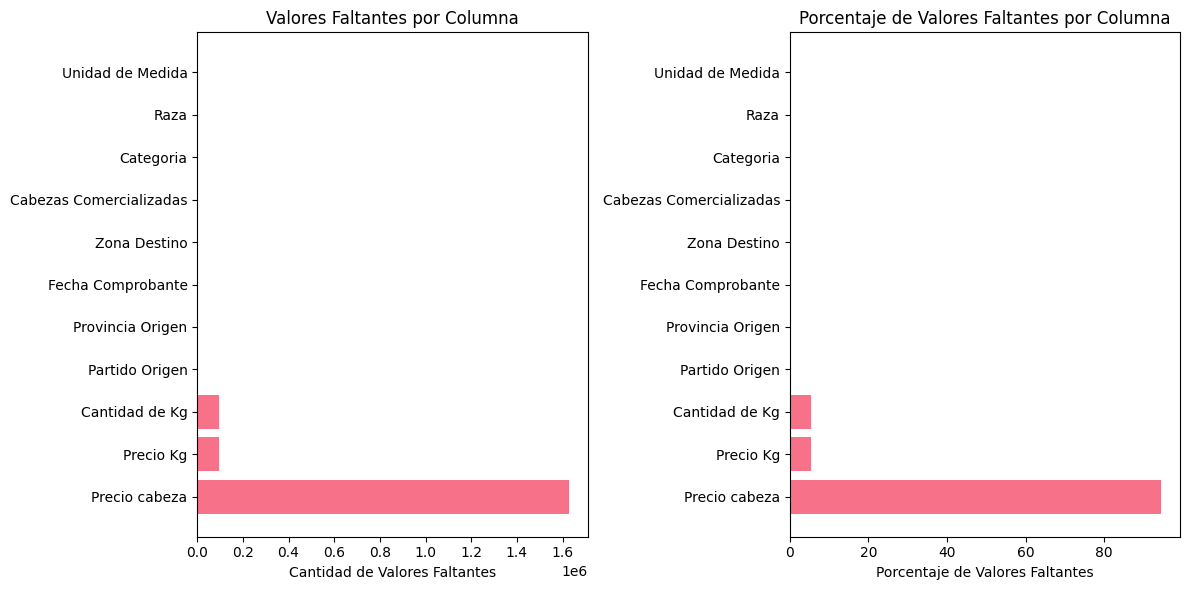

In [35]:
def analizarValoresFaltantes(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analiza valores faltantes en el dataset
    """
    print("=== ANÁLISIS DE VALORES FALTANTES ===")
    
    missing_data = pd.DataFrame({
        'Columna': df.columns,
        'Valores_Faltantes': df.isnull().sum(),
        'Porcentaje_Faltante': (df.isnull().sum() / len(df)) * 100,
        'Tipo_Dato': df.dtypes
    })
    
    missing_data = missing_data.sort_values('Porcentaje_Faltante', ascending=False)
    print(missing_data.to_string(index=False))
    
    # Visualización de valores faltantes si existen
    if missing_data['Valores_Faltantes'].sum() > 0:
        plt.figure(figsize=(12, 6))
        missing_cols = missing_data[missing_data['Valores_Faltantes'] > 0]
        
        if len(missing_cols) > 0:
            plt.subplot(1, 2, 1)
            plt.barh(missing_cols['Columna'], missing_cols['Valores_Faltantes'])
            plt.xlabel('Cantidad de Valores Faltantes')
            plt.title('Valores Faltantes por Columna')
            
            plt.subplot(1, 2, 2)
            plt.barh(missing_cols['Columna'], missing_cols['Porcentaje_Faltante'])
            plt.xlabel('Porcentaje de Valores Faltantes')
            plt.title('Porcentaje de Valores Faltantes por Columna')
            
            plt.tight_layout()
            plt.show()
    else:
        print("\nNo hay valores faltantes en el dataset.")
    
    return missing_data

analisis_faltantes = analizarValoresFaltantes(df)


In [36]:
def analizarVariablesCategoricas(df: pd.DataFrame) -> dict:
    """
    Analiza las variables categóricas del dataset
    """
    print("=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")
    
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    analisis_categoricas = {}
    
    for col in categorical_cols:
        print(f"\n--- {col.upper()} ---")
        unique_vals = df[col].nunique()
        print(f"Valores únicos: {unique_vals:,}")
        
        if unique_vals <= 20:
            freq_table = df[col].value_counts()
            print("\nFrecuencias:")
            for val, count in freq_table.head(10).items():
                percentage = (count / len(df)) * 100
                print(f"  {val}: {count:,} ({percentage:.2f}%)")
            
            analisis_categoricas[col] = {
                'valores_unicos': unique_vals,
                'frecuencias': freq_table.to_dict()
            }
        else:
            print(f"\nTop 10 valores más frecuentes en {col}:")
            freq_table = df[col].value_counts().head(10)
            for val, count in freq_table.items():
                percentage = (count / len(df)) * 100
                print(f"  {val}: {count:,} ({percentage:.2f}%)")
            
            analisis_categoricas[col] = {
                'valores_unicos': unique_vals,
                'top_10': freq_table.to_dict()
            }
    
    return analisis_categoricas

def analizarVariablesNumericas(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analiza las variables numéricas del dataset
    """
    print("\n=== ANÁLISIS DE VARIABLES NUMÉRICAS ===")
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numeric_cols:
        print("No se encontraron variables numéricas.")
        return pd.DataFrame()
    
    print(f"Variables numéricas encontradas: {len(numeric_cols)}")
    for col in numeric_cols:
        print(f"  - {col}")
    
    # Estadísticas descriptivas
    print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
    estadisticas = df[numeric_cols].describe()
    display(estadisticas)
    
    # Análisis detallado por variable
    for col in numeric_cols:
        print(f"\n--- {col.upper()} ---")
        serie = df[col].dropna()
        
        if len(serie) > 0:
            print(f"Valores válidos: {len(serie):,}")
            print(f"Valores únicos: {serie.nunique():,}")
            print(f"Mínimo: {serie.min():,.2f}")
            print(f"Máximo: {serie.max():,.2f}")
            print(f"Media: {serie.mean():,.2f}")
            print(f"Mediana: {serie.median():,.2f}")
            print(f"Desviación estándar: {serie.std():,.2f}")
            
            # Detectar outliers usando IQR
            Q1 = serie.quantile(0.25)
            Q3 = serie.quantile(0.75)
            IQR = Q3 - Q1
            outliers_inf = (serie < (Q1 - 1.5 * IQR)).sum()
            outliers_sup = (serie > (Q3 + 1.5 * IQR)).sum()
            total_outliers = outliers_inf + outliers_sup
            
            print(f"Outliers detectados: {total_outliers:,} ({(total_outliers/len(serie))*100:.2f}%)")
            print(f"  - Inferiores: {outliers_inf:,}")
            print(f"  - Superiores: {outliers_sup:,}")
    
    return estadisticas

# Ejecutar análisis
analisis_cat = analizarVariablesCategoricas(df)
estadisticas_num = analizarVariablesNumericas(df)


=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===

--- FECHA COMPROBANTE ---
Valores únicos: 388

Top 10 valores más frecuentes en Fecha Comprobante:
  03/03/2021: 14,171 (0.82%)
  23/09/2020: 13,494 (0.78%)
  16/09/2020: 13,121 (0.76%)
  09/09/2020: 13,118 (0.76%)
  20/01/2021: 13,118 (0.76%)
  16/12/2020: 13,003 (0.76%)
  15/09/2020: 12,721 (0.74%)
  09/12/2020: 12,372 (0.72%)
  10/02/2021: 12,289 (0.71%)
  15/12/2020: 12,207 (0.71%)

--- PROVINCIA ORIGEN ---
Valores únicos: 24

Top 10 valores más frecuentes en Provincia Origen:
  BUENOS AIRES: 562,340 (32.67%)
  CIUDAD AUTONOMA DE BUENOS AIRES: 252,702 (14.68%)
  CORDOBA: 250,985 (14.58%)
  SANTA FE: 229,283 (13.32%)
  ENTRE RIOS: 139,976 (8.13%)
  LA PAMPA: 59,802 (3.47%)
  SALTA: 45,636 (2.65%)
  CHACO: 44,750 (2.60%)
  CORRIENTES: 36,514 (2.12%)
  SANTIAGO DEL ESTERO: 25,218 (1.47%)

--- PARTIDO ORIGEN ---
Valores únicos: 350

Top 10 valores más frecuentes en Partido Origen:
  CIUDAD AUTONOMA DE BUENOS AIRES: 252,702 (14.68%)
  RIO CUART

,Cabezas Comercializadas,Cantidad de Kg
count,1.721212e+06,1.627932e+06
mean,5.726315e+01,4.962836e+03
std,5.353858e+04,1.224111e+04
min,1.000000e+00,1.000000e+00
25%,2.000000e+00,8.300000e+02
50%,6.000000e+00,2.380000e+03
75%,1.700000e+01,6.660000e+03
max,7.022330e+07,6.781100e+06



--- CABEZAS COMERCIALIZADAS ---
Valores válidos: 1,721,212
Valores únicos: 383
Mínimo: 1.00
Máximo: 70,223,300.00
Media: 57.26
Mediana: 6.00
Desviación estándar: 53,538.58
Outliers detectados: 124,732 (7.25%)
  - Inferiores: 0
  - Superiores: 124,732

--- CANTIDAD DE KG ---
Valores válidos: 1,627,932
Valores únicos: 24,604
Mínimo: 1.00
Máximo: 6,781,100.00
Media: 4,962.84
Mediana: 2,380.00
Desviación estándar: 12,241.11
Outliers detectados: 150,386 (9.24%)
  - Inferiores: 0
  - Superiores: 150,386


=== VISUALIZACIONES DE VARIABLES CATEGÓRICAS ===


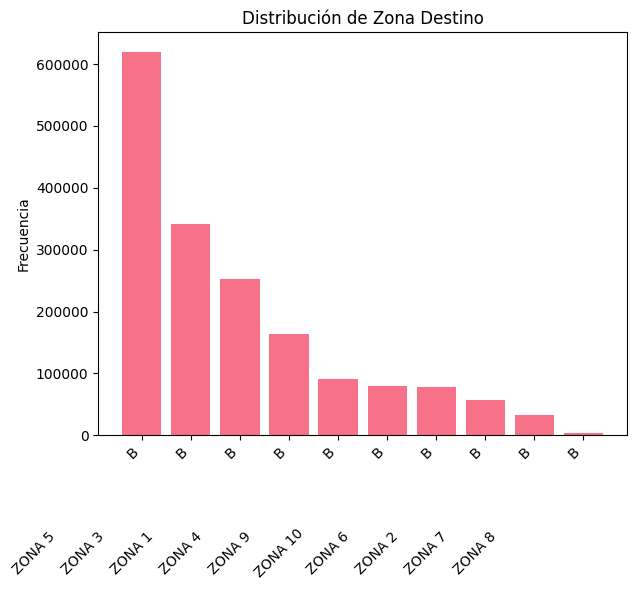

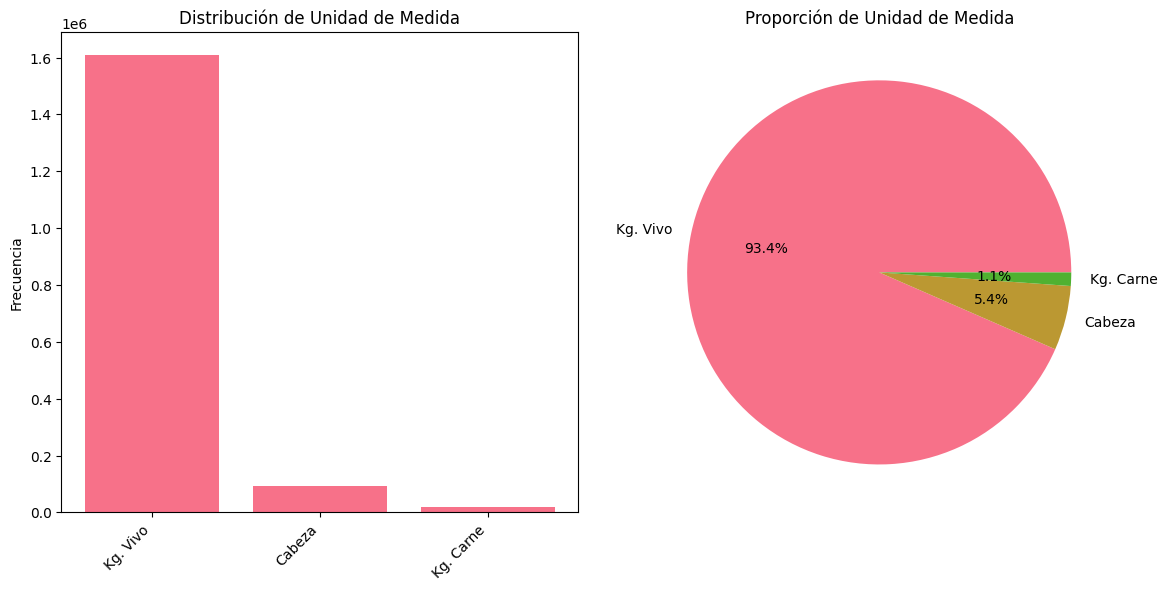


=== VISUALIZACIONES DE VARIABLES NUMÉRICAS ===


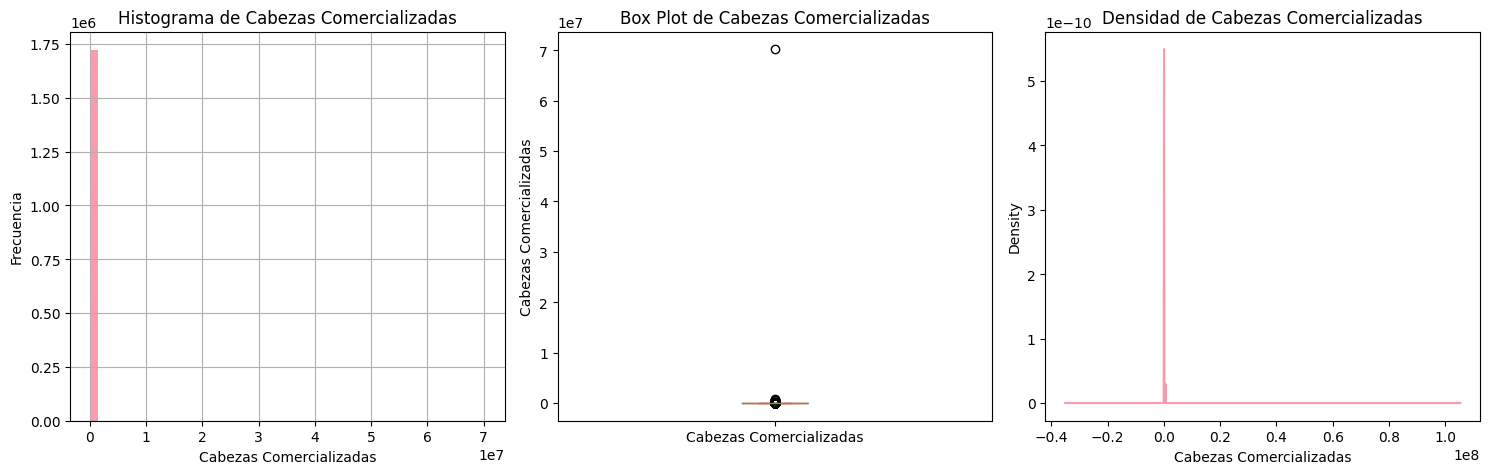

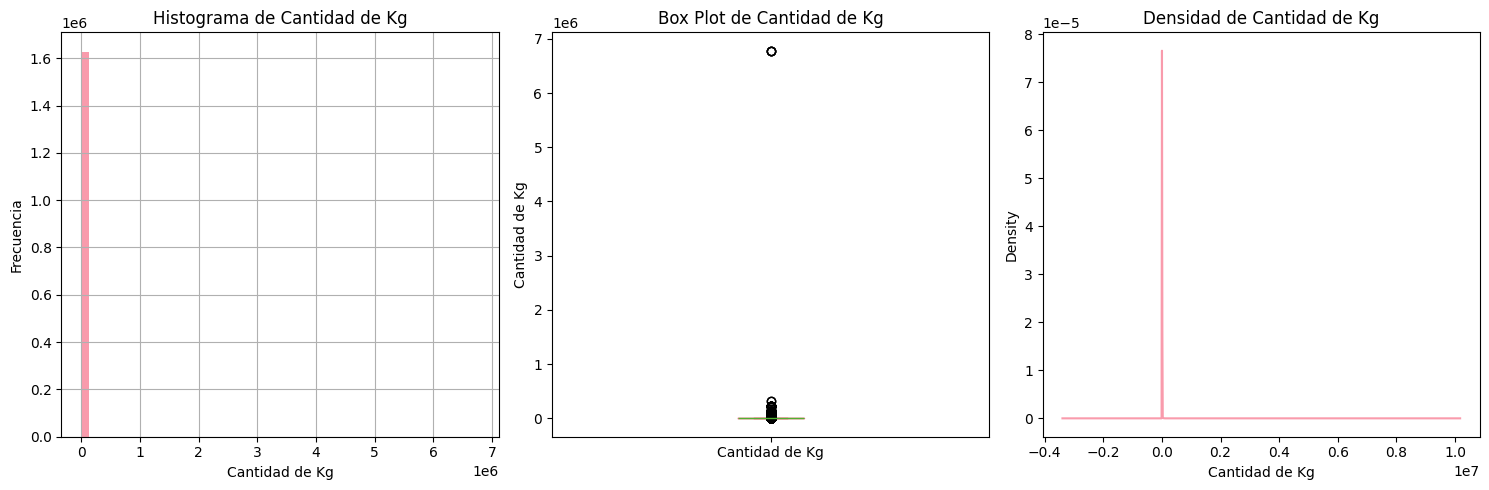

=== ANÁLISIS TEMPORAL ===

--- ANÁLISIS DE FECHA COMPROBANTE ---
Fecha mínima: 2020-08-01 00:00:00
Fecha máxima: 2021-08-23 00:00:00
Período total: 387 días

Distribución por año:
año
2020.0    790200
2021.0    931012
Name: count, dtype: int64

Distribución por mes:
mes
1.0     139062
2.0     162180
3.0     192018
4.0     104909
5.0      88910
6.0     101890
7.0      92661
8.0     232935
9.0     207922
10.0    120786
11.0    108336
12.0    169603
Name: count, dtype: int64


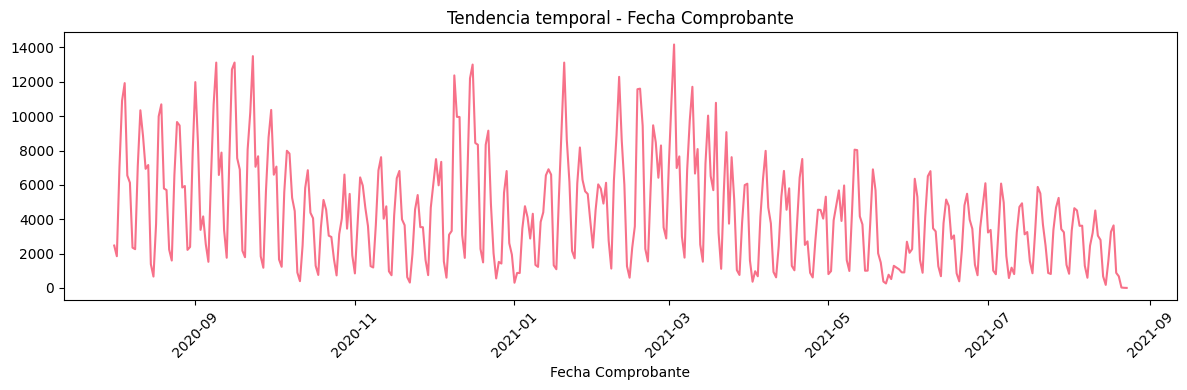

In [37]:
def generarVisualizacionesCategoricas(df: pd.DataFrame, max_categorias: int = 15) -> None:
    """
    Genera visualizaciones para variables categóricas
    """
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    for col in categorical_cols:
        if df[col].nunique() <= max_categorias:
            plt.figure(figsize=(12, 6))
            
            # Gráfico de barras
            plt.subplot(1, 2, 1)
            value_counts = df[col].value_counts().head(10)
            plt.bar(range(len(value_counts)), value_counts.values)
            plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
            plt.title(f'Distribución de {col}')
            plt.ylabel('Frecuencia')
            
            # Gráfico circular (solo si hay menos de 8 categorías)
            if len(value_counts) <= 8:
                plt.subplot(1, 2, 2)
                plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
                plt.title(f'Proporción de {col}')
            
            plt.tight_layout()
            plt.show()

def generarVisualizacionesNumericas(df: pd.DataFrame) -> None:
    """
    Genera visualizaciones para variables numéricas
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numeric_cols:
        print("No hay variables numéricas para visualizar.")
        return
    
    for col in numeric_cols:
        plt.figure(figsize=(15, 5))
        
        # Histograma
        plt.subplot(1, 3, 1)
        df[col].hist(bins=50, alpha=0.7)
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        
        # Box plot
        plt.subplot(1, 3, 2)
        df[col].plot(kind='box')
        plt.title(f'Box Plot de {col}')
        plt.ylabel(col)
        
        # Gráfico de densidad
        plt.subplot(1, 3, 3)
        df[col].plot(kind='density', alpha=0.7)
        plt.title(f'Densidad de {col}')
        plt.xlabel(col)
        
        plt.tight_layout()
        plt.show()

def analizarComponenteTemporal(df: pd.DataFrame) -> None:
    """
    Analiza el componente temporal del dataset
    """
    print("=== ANÁLISIS TEMPORAL ===")
    
    # Buscar columnas de fecha
    date_cols = []
    for col in df.columns:
        if 'fecha' in col.lower() or 'date' in col.lower():
            date_cols.append(col)
    
    if not date_cols:
        print("No se encontraron columnas de fecha explícitas.")
        # Buscar columnas que podrían contener fechas
        for col in df.select_dtypes(include=['object']).columns:
            sample = df[col].dropna().iloc[:100].astype(str)
            # Verificar si contiene patrones de fecha
            if sample.str.contains(r'\\d{4}[-/]\\d{1,2}[-/]\\d{1,2}|\\d{1,2}[-/]\\d{1,2}[-/]\\d{4}').any():
                date_cols.append(col)
                print(f"Posible columna de fecha detectada: {col}")
    
    for col in date_cols:
        print(f"\n--- ANÁLISIS DE {col.upper()} ---")
        
        try:
            # Convertir a datetime
            df_temp = df.copy()
            df_temp[col] = pd.to_datetime(df_temp[col], errors='coerce')
            
            # Estadísticas temporales
            fecha_min = df_temp[col].min()
            fecha_max = df_temp[col].max()
            periodo = fecha_max - fecha_min
            
            print(f"Fecha mínima: {fecha_min}")
            print(f"Fecha máxima: {fecha_max}")
            print(f"Período total: {periodo.days} días")
            
            # Análisis por período
            df_temp['año'] = df_temp[col].dt.year
            df_temp['mes'] = df_temp[col].dt.month
            
            print("\nDistribución por año:")
            print(df_temp['año'].value_counts().sort_index())
            
            print("\nDistribución por mes:")
            print(df_temp['mes'].value_counts().sort_index())
            
            # Visualización temporal básica
            plt.figure(figsize=(12, 4))
            df_temp.groupby(df_temp[col].dt.date).size().plot()
            plt.title(f'Tendencia temporal - {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error al procesar la columna {col}: {e}")

# Ejecutar visualizaciones y análisis temporal
print("=== VISUALIZACIONES DE VARIABLES CATEGÓRICAS ===")
generarVisualizacionesCategoricas(df)

print("\n=== VISUALIZACIONES DE VARIABLES NUMÉRICAS ===")
generarVisualizacionesNumericas(df)

analizarComponenteTemporal(df)


In [38]:
def generarResumenEjecutivo(df: pd.DataFrame, analisis_faltantes: pd.DataFrame) -> str:
    """
    Genera un resumen ejecutivo del análisis exploratorio
    """
    resumen = []
    resumen.append("ANÁLISIS EXPLORATORIO DE DATOS")
    resumen.append("=" * 50)
    resumen.append(f"")
    resumen.append(f"CARACTERÍSTICAS GENERALES DEL DATASET:")
    resumen.append(f"- Dimensiones: {df.shape[0]:,} registros x {df.shape[1]} variables")
    resumen.append(f"- Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    resumen.append(f"")
    
    # Análisis de tipos de datos
    tipos_datos = df.dtypes.value_counts()
    resumen.append(f"TIPOS DE DATOS:")
    for tipo, cantidad in tipos_datos.items():
        resumen.append(f"- {tipo}: {cantidad} variables")
    resumen.append(f"")
    
    # Variables categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    resumen.append(f"VARIABLES CATEGÓRICAS ({len(categorical_cols)}):")
    for col in categorical_cols:
        unique_count = df[col].nunique()
        resumen.append(f"- {col}: {unique_count:,} valores únicos")
    resumen.append(f"")
    
    # Variables numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        resumen.append(f"VARIABLES NUMÉRICAS ({len(numeric_cols)}):")
        for col in numeric_cols:
            serie = df[col].dropna()
            if len(serie) > 0:
                Q1 = serie.quantile(0.25)
                Q3 = serie.quantile(0.75)
                IQR = Q3 - Q1
                outliers = ((serie < (Q1 - 1.5 * IQR)) | (serie > (Q3 + 1.5 * IQR))).sum()
                pct_outliers = (outliers / len(serie)) * 100
                resumen.append(f"- {col}: Rango [{serie.min():.2f}, {serie.max():.2f}], {outliers:,} outliers ({pct_outliers:.1f}%)")
        resumen.append(f"")
    
    # Calidad de datos
    total_missing = analisis_faltantes['Valores_Faltantes'].sum()
    resumen.append(f"CALIDAD DE DATOS:")
    resumen.append(f"- Total de valores faltantes: {total_missing:,}")
    resumen.append(f"- Porcentaje de completitud: {((df.shape[0] * df.shape[1] - total_missing) / (df.shape[0] * df.shape[1])) * 100:.2f}%")
    
    if total_missing > 0:
        cols_con_faltantes = analisis_faltantes[analisis_faltantes['Valores_Faltantes'] > 0]
        resumen.append(f"- Variables con datos faltantes: {len(cols_con_faltantes)}")
        for _, row in cols_con_faltantes.head(5).iterrows():
            resumen.append(f"  * {row['Columna']}: {row['Porcentaje_Faltante']:.2f}%")
    resumen.append(f"")
    
    # Duplicados
    duplicados = df.duplicated().sum()
    resumen.append(f"REGISTROS DUPLICADOS: {duplicados:,} ({(duplicados/len(df))*100:.2f}%)")
    resumen.append(f"")
    
    # Buscar columnas de fecha para análisis temporal
    date_cols = [col for col in df.columns if 'fecha' in col.lower() or 'date' in col.lower()]
    if date_cols:
        resumen.append(f"ANÁLISIS TEMPORAL:")
        for col in date_cols:
            try:
                df_temp = df[col].dropna()
                if len(df_temp) > 0:
                    fecha_sample = pd.to_datetime(df_temp.iloc[0], errors='coerce')
                    if pd.notna(fecha_sample):
                        resumen.append(f"- Columna temporal detectada: {col}")
            except:
                pass
        resumen.append(f"")
    
    # Recomendaciones
    resumen.append(f"PRINCIPALES HALLAZGOS Y RECOMENDACIONES:")
    
    if total_missing > 0:
        resumen.append(f"- Se requiere tratamiento de valores faltantes antes del análisis")
    
    if duplicados > 0:
        resumen.append(f"- Evaluar eliminación de registros duplicados")
    
    # Variables con alta cardinalidad
    for col in categorical_cols:
        if df[col].nunique() > 100:
            resumen.append(f"- {col} tiene alta cardinalidad ({df[col].nunique():,} valores), considerar agrupación")
    
    # Verificar si hay outliers significativos
    outliers_significativos = False
    for col in numeric_cols:
        serie = df[col].dropna()
        if len(serie) > 0:
            Q1 = serie.quantile(0.25)
            Q3 = serie.quantile(0.75)
            IQR = Q3 - Q1
            outliers = ((serie < (Q1 - 1.5 * IQR)) | (serie > (Q3 + 1.5 * IQR))).sum()
            if outliers > len(serie) * 0.05:
                outliers_significativos = True
                break
    
    if outliers_significativos:
        resumen.append(f"- Análisis detallado de outliers requerido para variables numéricas")
    
    if len(categorical_cols) > 0 and len(numeric_cols) > 0:
        resumen.append(f"- Dataset apto para aplicación de reglas de asociación tras preparación")
    
    resumen_text = "\\n".join(resumen)
    return resumen_text

def exportarResultados(resumen: str, ruta_salida: str) -> None:
    """
    Exporta los resultados del análisis exploratorio a un archivo de texto
    """
    try:
        import os
        os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)
        
        with open(ruta_salida, 'w', encoding='utf-8') as f:
            f.write(resumen)
        print(f"Resultados exportados exitosamente a: {ruta_salida}")
    except Exception as e:
        print(f"Error al exportar resultados: {e}")

# Generar y exportar resumen
resumen_final = generarResumenEjecutivo(df, analisis_faltantes)
print(resumen_final)

# Exportar resumen
exportarResultados(resumen_final, '../analisis/analisis_exploratorio.txt')

print("\\n" + "="*60)
print("ANÁLISIS EXPLORATORIO COMPLETADO")
print("="*60)
print("El análisis exploratorio ha sido completado exitosamente.")
print("Los resultados han sido guardados en 'analisis/analisis_exploratorio.txt'")


ANÁLISIS EXPLORATORIO DE DATOS\n==================================================\n\nCARACTERÍSTICAS GENERALES DEL DATASET:\n- Dimensiones: 1,721,218 registros x 11 variables\n- Tamaño en memoria: 1084.21 MB\n\nTIPOS DE DATOS:\n- object: 9 variables\n- float64: 2 variables\n\nVARIABLES CATEGÓRICAS (9):\n- Fecha Comprobante: 388 valores únicos\n- Provincia Origen: 24 valores únicos\n- Partido Origen: 350 valores únicos\n- Zona Destino: 10 valores únicos\n- Raza: 23 valores únicos\n- Categoria: 33 valores únicos\n- Unidad de Medida: 3 valores únicos\n- Precio cabeza: 15,783 valores únicos\n- Precio Kg: 78,840 valores únicos\n\nVARIABLES NUMÉRICAS (2):\n- Cabezas Comercializadas: Rango [1.00, 70223300.00], 124,732 outliers (7.2%)\n- Cantidad de Kg: Rango [1.00, 6781100.00], 150,386 outliers (9.2%)\n\nCALIDAD DE DATOS:\n- Total de valores faltantes: 1,814,558\n- Porcentaje de completitud: 90.42%\n- Variables con datos faltantes: 11\n  * Precio cabeza: 94.58%\n  * Precio Kg: 5.42%\n  * Can